In [1]:
print("Hello! Python is working!")

Hello! Python is working!


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("All libraries imported successfully!")

All libraries imported successfully!


In [3]:
# Load a sample dataset
from sklearn.datasets import load_iris
import pandas as pd

# Load Iris dataset
iris = load_iris()

# Convert to pandas DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

# Display first few rows
print("Dataset loaded successfully!")
print(df.head())

Dataset loaded successfully!
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [4]:
# Basic information about the dataset
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nBasic statistics:")
print(df.describe())

Dataset shape: (150, 5)

Column names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species']

Basic statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


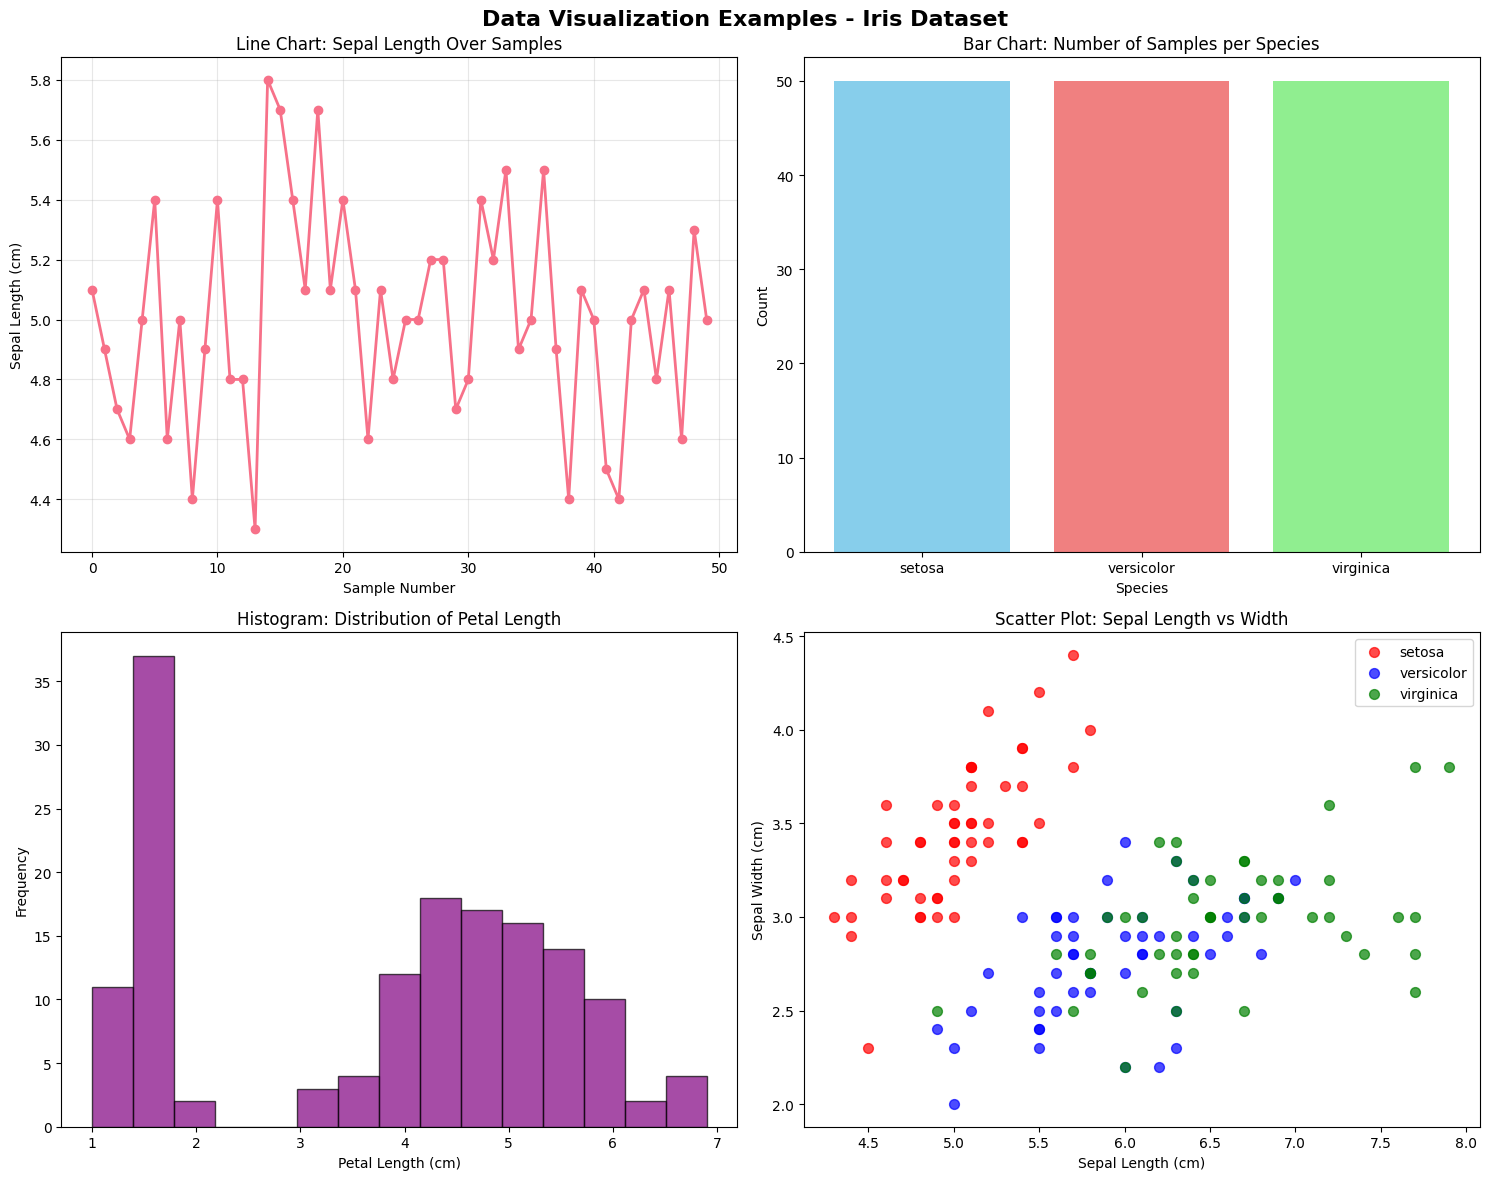

In [5]:
# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Data Visualization Examples - Iris Dataset', fontsize=16, fontweight='bold')

# 1. LINE CHART - Trends over time (we'll simulate this)
axes[0,0].plot(df.index[:50], df['sepal length (cm)'][:50], marker='o', linewidth=2)
axes[0,0].set_title('Line Chart: Sepal Length Over Samples')
axes[0,0].set_xlabel('Sample Number')
axes[0,0].set_ylabel('Sepal Length (cm)')
axes[0,0].grid(True, alpha=0.3)

# 2. BAR CHART - Compare species counts
species_counts = df['species'].value_counts()
bars = axes[0,1].bar(species_counts.index, species_counts.values,
                     color=['skyblue', 'lightcoral', 'lightgreen'])
axes[0,1].set_title('Bar Chart: Number of Samples per Species')
axes[0,1].set_xlabel('Species')
axes[0,1].set_ylabel('Count')

# HISTOGRAM - Distribution of data
axes[1,0].hist(df['petal length (cm)'], bins=15, color='purple', alpha=0.7, edgecolor='black')
axes[1,0].set_title('Histogram: Distribution of Petal Length')
axes[1,0].set_xlabel('Petal Length (cm)')
axes[1,0].set_ylabel('Frequency')

 # SCATTER PLOT - Relationship between variables
colors = {'setosa': 'red', 'versicolor': 'blue', 'virginica': 'green'}
for species in df['species'].unique():
    species_data = df[df['species'] == species]
    axes[1,1].scatter(species_data['sepal length (cm)'], species_data['sepal width (cm)'],
                     c=colors[species], label=species, alpha=0.7, s=50)
axes[1,1].set_title('Scatter Plot: Sepal Length vs Width')
axes[1,1].set_xlabel('Sepal Length (cm)')
axes[1,1].set_ylabel('Sepal Width (cm)')
axes[1,1].legend()

plt.tight_layout()
plt.show()

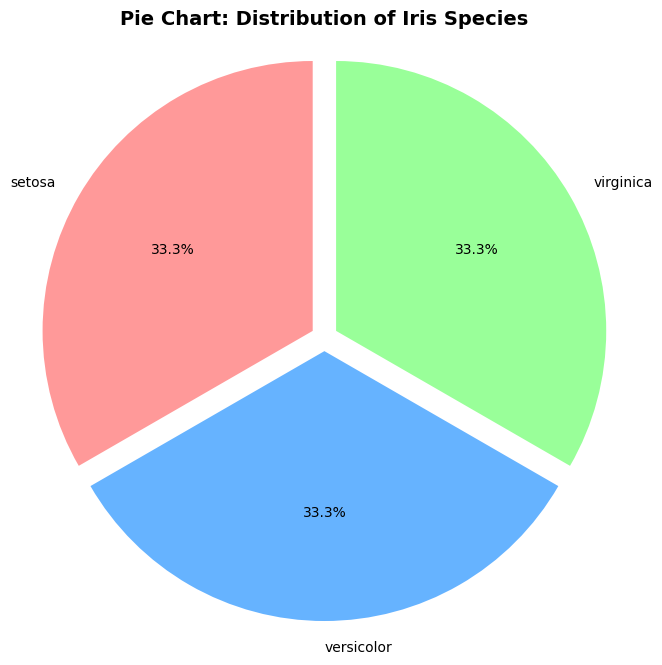

In [6]:
# PIE CHART - Show contribution of each species
plt.figure(figsize=(8, 8))
species_counts = df['species'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99']

plt.pie(species_counts.values, labels=species_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90, explode=(0.05, 0.05, 0.05))
plt.title('Pie Chart: Distribution of Iris Species', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

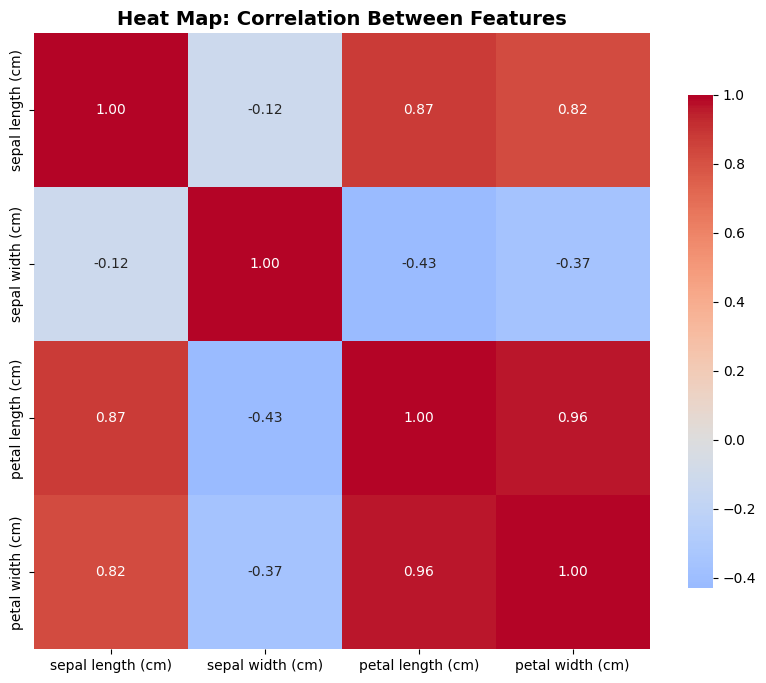

In [7]:
# HEAT MAP - Show correlation between numerical variables
plt.figure(figsize=(10, 8))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Heat Map: Correlation Between Features', fontsize=14, fontweight='bold')
plt.show()

In [8]:
print("=== DATA FILTERING EXAMPLES ===\n")

# 1. Filter flowers with sepal length > 6.0
large_sepals = df[df['sepal length (cm)'] > 6.0]
print(f"1. Flowers with sepal length > 6.0 cm: {len(large_sepals)} out of {len(df)}")
print(large_sepals.head())

print("\n" + "="*50 + "\n")

# 2. Filter only 'setosa' species
setosa_only = df[df['species'] == 'setosa']
print(f"2. Only Setosa species: {len(setosa_only)} flowers")
print(setosa_only.head())

print("\n" + "="*50 + "\n")

# 3. Complex filtering - large petals AND specific species
large_petals_versicolor = df[(df['petal length (cm)'] > 4.0) & (df['species'] == 'versicolor')]
print(f"3. Versicolor with petal length > 4.0: {len(large_petals_versicolor)} flowers")
print(large_petals_versicolor.head())

=== DATA FILTERING EXAMPLES ===

1. Flowers with sepal length > 6.0 cm: 61 out of 150
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
50                7.0               3.2                4.7               1.4   
51                6.4               3.2                4.5               1.5   
52                6.9               3.1                4.9               1.5   
54                6.5               2.8                4.6               1.5   
56                6.3               3.3                4.7               1.6   

       species  
50  versicolor  
51  versicolor  
52  versicolor  
54  versicolor  
56  versicolor  


2. Only Setosa species: 50 flowers
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3

In [9]:
print("=== DATA GROUPING AND AGGREGATION ===\n")

# 1. Group by species and calculate mean values
species_means = df.groupby('species').mean()
print("1. Average measurements by species:")
print(species_means.round(2))

print("\n" + "="*50 + "\n")

# 2. Multiple aggregation functions
species_stats = df.groupby('species').agg({
    'sepal length (cm)': ['mean', 'max', 'min'],
    'petal length (cm)': ['mean', 'std'],
    'sepal width (cm)': 'count'
})
print("2. Detailed statistics by species:")
print(species_stats.round(2))

print("\n" + "="*50 + "\n")

# 3. Create custom categories and group by them
df['size_category'] = df['petal length (cm)'].apply(
    lambda x: 'Small' if x < 2 else 'Medium' if x < 5 else 'Large'
)

size_groups = df.groupby('size_category')['species'].value_counts()
print("3. Species distribution by petal size category:")
print(size_groups)

=== DATA GROUPING AND AGGREGATION ===

1. Average measurements by species:
            sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                                                              
setosa                   5.01              3.43               1.46   
versicolor               5.94              2.77               4.26   
virginica                6.59              2.97               5.55   

            petal width (cm)  
species                       
setosa                  0.25  
versicolor              1.33  
virginica               2.03  


2. Detailed statistics by species:
           sepal length (cm)           petal length (cm)        \
                        mean  max  min              mean   std   
species                                                          
setosa                  5.01  5.8  4.3              1.46  0.17   
versicolor              5.94  7.0  4.9              4.26  0.47   
virginica               6.59  7.9  4.9              

In [10]:
print("=== ADVANCED DATA ANALYSIS ===\n")

# 1. Find outliers using statistical methods
def find_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers = find_outliers('sepal width (cm)')
print(f"1. Outliers in sepal width: {len(outliers)} found")
if len(outliers) > 0:
    print(outliers[['sepal width (cm)', 'species']])

print("\n" + "="*50 + "\n")

# 2. Create summary report
summary_report = {
    'Total Samples': len(df),
    'Number of Species': df['species'].nunique(),
    'Average Sepal Length': df['sepal length (cm)'].mean().round(2),
    'Average Petal Length': df['petal length (cm)'].mean().round(2),
    'Most Common Species': df['species'].mode()[0]
}

print("2. Dataset Summary Report:")
for key, value in summary_report.items():
    print(f"   {key}: {value}")

print("\n" + "="*50 + "\n")

# 3. Correlation analysis
correlations = df.select_dtypes(include=[np.number]).corr()
strongest_correlation = correlations.abs().unstack().sort_values(ascending=False)
# Remove self-correlations (diagonal values)
strongest_correlation = strongest_correlation[strongest_correlation < 1.0]

print("3. Strongest correlations between features:")
print(f"   Highest correlation: {strongest_correlation.index[0]} = {strongest_correlation.iloc[0]:.3f}")
print(f"   Second highest: {strongest_correlation.index[1]} = {strongest_correlation.iloc[1]:.3f}")

=== ADVANCED DATA ANALYSIS ===

1. Outliers in sepal width: 4 found
    sepal width (cm)     species
15               4.4      setosa
32               4.1      setosa
33               4.2      setosa
60               2.0  versicolor


2. Dataset Summary Report:
   Total Samples: 150
   Number of Species: 3
   Average Sepal Length: 5.84
   Average Petal Length: 3.76
   Most Common Species: setosa


3. Strongest correlations between features:
   Highest correlation: ('petal length (cm)', 'petal width (cm)') = 0.963
   Second highest: ('petal width (cm)', 'petal length (cm)') = 0.963


In [11]:
print("="*60)
print("           IRIS DATASET ANALYSIS - PROJECT SUMMARY")
print("="*60)

print(f"""
📊 DATASET OVERVIEW:
   • Dataset: Iris Flower Dataset
   • Total Samples: {len(df)}
   • Features: {len(df.columns)-1} numerical + 1 categorical
   • Species: {', '.join(df['species'].unique())}

🔍 DATA MANIPULATION TASKS COMPLETED:
   ✅ Data Loading and Exploration
   ✅ Data Filtering (by conditions)
   ✅ Data Grouping (by species)
   ✅ Data Aggregation (mean, max, min, count)
   ✅ Statistical Analysis (outliers, correlations)

📈 VISUALIZATIONS CREATED:
   ✅ Line Chart (trends over samples)
   ✅ Bar Chart (species distribution)
   ✅ Histogram (feature distribution)
   ✅ Scatter Plot (feature relationships)
   ✅ Pie Chart (species proportions)
   ✅ Heat Map (correlation matrix)

🎯 KEY FINDINGS:
   • Most common species: {df['species'].mode()[0]}
   • Average sepal length: {df['sepal length (cm)'].mean():.2f} cm
   • Average petal length: {df['petal length (cm)'].mean():.2f} cm
   • Strongest correlation: Petal length & Petal width
""")

print("="*60)
print("✅ PROJECT COMPLETED SUCCESSFULLY!")
print("="*60)

           IRIS DATASET ANALYSIS - PROJECT SUMMARY

📊 DATASET OVERVIEW:
   • Dataset: Iris Flower Dataset
   • Total Samples: 150
   • Features: 5 numerical + 1 categorical
   • Species: setosa, versicolor, virginica

🔍 DATA MANIPULATION TASKS COMPLETED:
   ✅ Data Loading and Exploration
   ✅ Data Filtering (by conditions)
   ✅ Data Grouping (by species)
   ✅ Data Aggregation (mean, max, min, count)
   ✅ Statistical Analysis (outliers, correlations)

📈 VISUALIZATIONS CREATED:
   ✅ Line Chart (trends over samples)
   ✅ Bar Chart (species distribution)
   ✅ Histogram (feature distribution)
   ✅ Scatter Plot (feature relationships)
   ✅ Pie Chart (species proportions)
   ✅ Heat Map (correlation matrix)

🎯 KEY FINDINGS:
   • Most common species: setosa
   • Average sepal length: 5.84 cm
   • Average petal length: 3.76 cm
   • Strongest correlation: Petal length & Petal width

✅ PROJECT COMPLETED SUCCESSFULLY!
